## Initial Multi-Trial DBA
1. See an updated version in NB 101
2. Memoization was dropped due to time constraints

In [30]:
import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, a8]
plt.rcParams.update({'font.size': 18})
plt.rc('legend', fontsize=12) 

import random
from scipy.special import rel_entr

from math import isnan, isinf

from attack_funcs import *
from dp_block_funcs import *

In [31]:
my_color_vec = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
ths = [0,2,5]
k_vec = [1,5,10,20,30]
num_trials = 8

In [32]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
all_fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

#pd.set_option('display.max_rows', 100)
df = pd.read_csv(datafile, skipinitialspace=True, usecols=all_fields)
fields = 'FairlyActiveMinutes'
selected_data = df[['Id',fields]]
n_rows, n_cols = df.shape

selected_data.head()

,Id,FairlyActiveMinutes
0,1503960366,13
1,1503960366,19
2,1503960366,11
3,1503960366,34
4,1503960366,10


## No Privacy Mechanism (Anonymous)

In [33]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [34]:
res_df = run_n_attacks(df, df, num_trials, sample_size=2)

SANITY CHECK:
4319703577 in training_IDs: False
6290855005 in training_IDs: False
5577150313 in training_IDs: True
2873212765 in training_IDs: True
TEST IDs:

[4319703577, 6290855005]
TEST VALS 1
[ 0 15  9  0  0  0  9  0 18  0 19  0  5  8 21 47  8 18 38  0 11 26 13 34
 11 28  0 14 12 18  0]

TEST VALS 2
[ 0  0  0  0  0 12  0  0  0  0  0  0  0  3  0  0  0  0  0 95  0  0  0  0
  0  0  0  0  0]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of positives found (2)!
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=30: Incorrect number of positives... found (1) vs expected (2)
--------------------------------------------
END OF ATTACK NUMBER 8
--------------------------------------------



In [35]:
res_df.fillna(0)
width = 0.8
my_xs = k_vec
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_df.loc[res_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

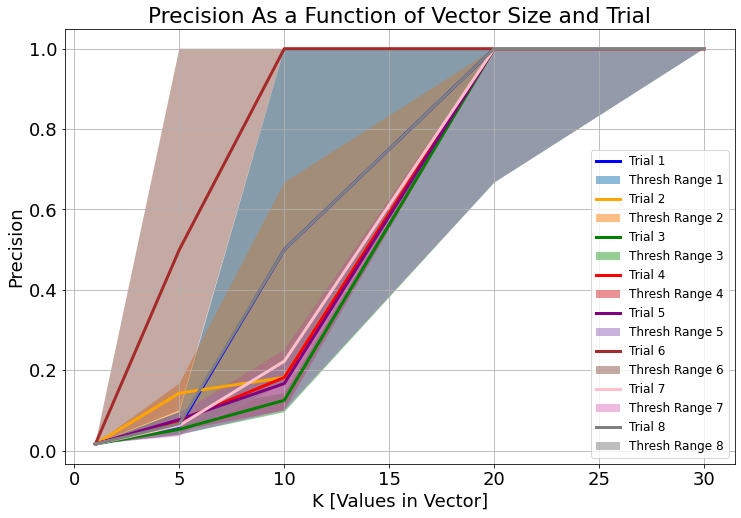

<Figure size 864x576 with 0 Axes>

In [36]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision As a Function of Vector Size and Trial')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

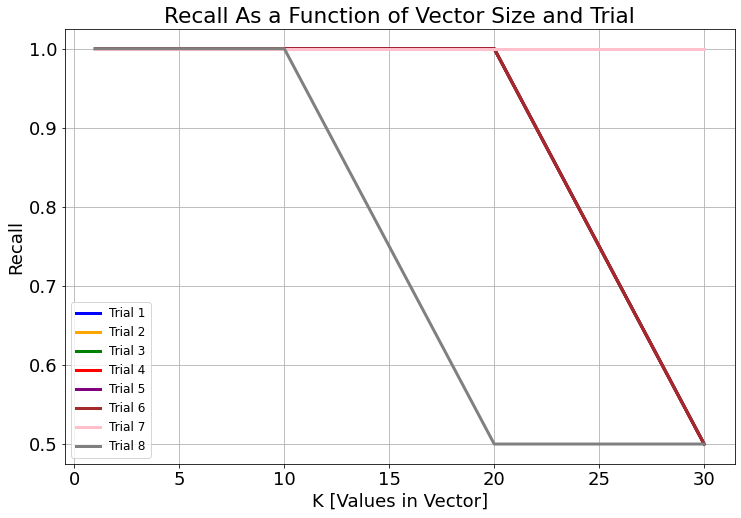

<Figure size 864x576 with 0 Axes>

In [37]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall As a Function of Vector Size and Trial')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend()
ax.grid(visible=True, which='both')

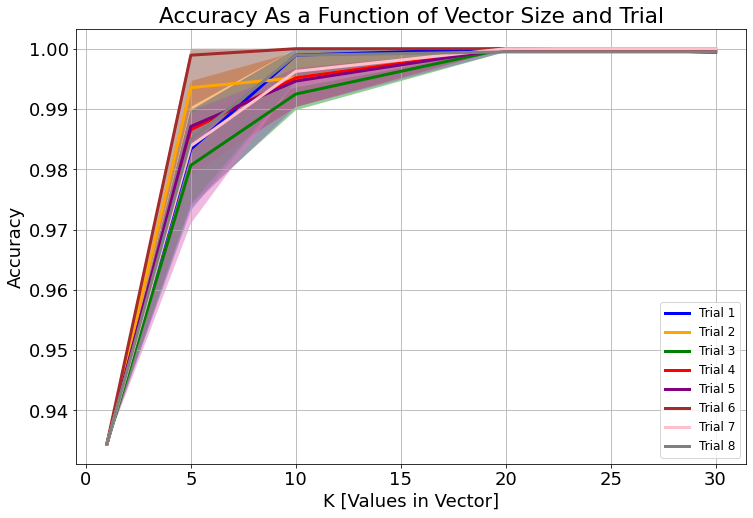

<Figure size 864x576 with 0 Axes>

In [38]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy As a Function of Vector Size and Trial')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend()
ax.grid(visible=True, which='both')

## Differential Privacy Set Up

In [39]:
values = list(selected_data['FairlyActiveMinutes'].unique())
privmax = reportNoisyMax(values, 1.0)
print(int(privmax))

143


In [40]:
#Divide the rande [0,150] into buckets of 10
blocks = list()
block = list()
for i in range(0, math.ceil(privmax)):
    block.append(i)
    if len(block)>=10:
        blocks.append(block)
        block = list()
        
IDs = selected_data['Id'].unique()
individualAct = dict()
selectedIDs = IDs
for Id in selectedIDs:
    act = selected_data[selected_data['Id']==Id]
    individualAct[Id] = act['FairlyActiveMinutes'].tolist()

In [41]:
ep_list = [0.01, 0.1, 1.0, 2.0, 5.0, 10.0]
LEP = len(ep_list)

#for i, epsilon in enumerate(ep_list):

pB=0.85
#pB = calc_pB_block(epsilon, blocks)
#pB = calc_pB_individual(epsilon, blocks, values)

#Sanitize without memoization
sanProfiles = sanitizeActProfile(IDs,individualAct,pB,blocks)
#Sanitize with memoization
sanProfilesM = sanitizeActProfile(IDs,individualAct,pB,blocks,True)

## BlockRR, No Memoization

In [42]:
P_df = pd.DataFrame()

for key in sanProfiles.keys():
    for val in sanProfiles[key]:
        P_df = P_df.append(pd.Series([key, val]), ignore_index=True)
P_df.columns = ['Id', 'FairlyActiveMinutes']

res_P_df = run_n_attacks(df, P_df, num_trials, sample_size=2, ths=ths, k_vec=k_vec)

SANITY CHECK:
1503960366 in training_IDs: False
4388161847 in training_IDs: False
3977333714 in training_IDs: True
6962181067 in training_IDs: True
TEST IDs:

[1503960366, 4388161847]
TEST VALS 1
[ 18.  12.  10.  31.  15.  24.  17.  31.  10.   2.  21. 127.   3.  10.
  23.  14.  27.  17.  38.  36.  18.  22.  26.  23.  28.  40. 129.  17.
  32.  26.   4.]

TEST VALS 2
[  7.  11.  33.   8.   3.  96.   7.  10.   0.  10.  29. 126.   5.  32.
  20.  48.  15.  12.  44.  15.   9.  16.  77.  31.  48.  58. 139.  11.
  74.  12.  82.]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=10: Incorre

C:\Users\kdmen\Desktop\Spring2022\BMIF_7380\BMIF_Project\attack_funcs.py:101: RuntimeWarning: invalid value encountered in double_scalars
  precision = true_positives[j, k_idx] / (true_positives[j, k_idx] + false_positives)


Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=5, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=5, k=30: Incorrect number of positives... found (0) vs expected (2)
-----------------------------------------

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=10: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=20: Incorrect number of positives... found (0) vs expected (2)
Th=5, k=30: Incorrect number of positives... found (0) vs expected (2)
---------------------

In [43]:
res_P_df.head(20)

,Trial,Test_IDs,Threshold,K,Precision,Recall,Accuracy
0,0,"[1503960366, 4388161847]",0,1,0.016260,1.0,0.934946
0,0,"[1503960366, 4388161847]",0,5,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",0,10,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",0,20,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",0,30,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",2,1,0.016129,1.0,0.934409
0,0,"[1503960366, 4388161847]",2,5,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",2,10,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",2,20,NaN,0.0,0.998925
0,0,"[1503960366, 4388161847]",2,30,NaN,0.0,0.998925


In [44]:
res_P_df.fillna(0)
width = 0.8
#my_xs = k_vec
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_P_df.loc[res_P_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

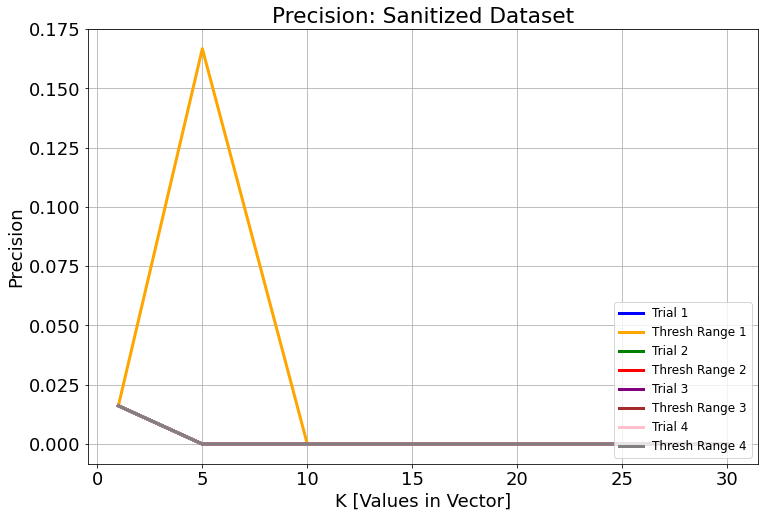

<Figure size 864x576 with 0 Axes>

In [45]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, [0 if isnan(ele) else ele for ele in results2_list[i][0]], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    #ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision: Sanitized Dataset')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

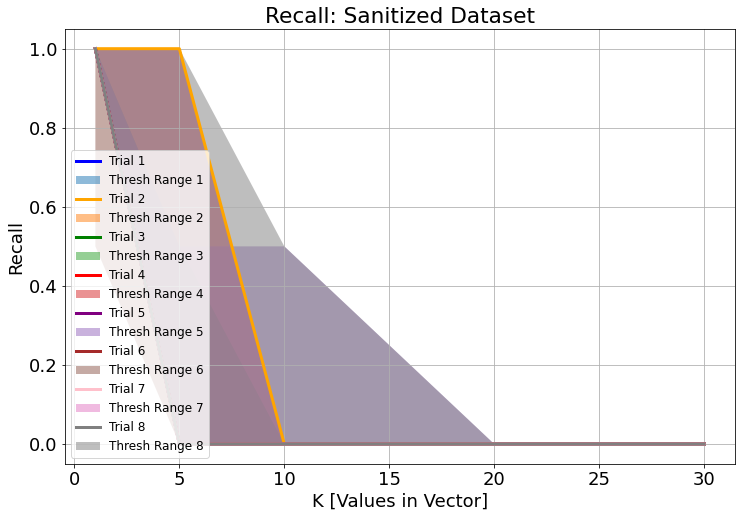

<Figure size 864x576 with 0 Axes>

In [46]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall: Sanitized Dataset')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower left')
ax.grid(visible=True, which='both')

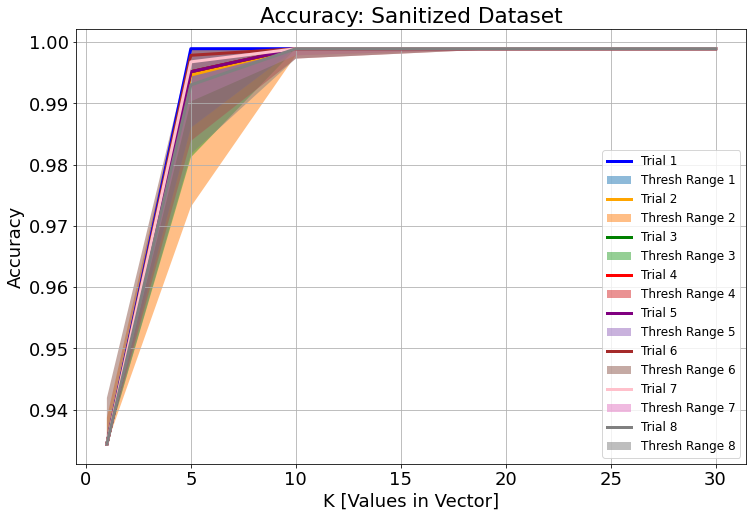

<Figure size 864x576 with 0 Axes>

In [47]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy: Sanitized Dataset')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

In [18]:
print('Dont run the rest of these, memoization is not yet complete')
raise()

Dont run the rest of these, memoization is not yet complete


TypeError: exceptions must derive from BaseException

## BlockRR, Memoization

In [ ]:
PM_df = pd.DataFrame()

for key in sanProfilesM.keys():
    for val in sanProfilesM[key]:
        PM_df = PM_df.append(pd.Series([key, val]), ignore_index=True)
PM_df.columns = ['Id', 'FairlyActiveMinutes']

res_PM_df = run_n_attacks(df, PM_df, 8, sample_size=2)

In [ ]:
res_PM_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_PM_df.loc[res_PM_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision: Sanitized Dataset With Memoization')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall: Sanitized Dataset With Memoization')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower left')
ax.grid(visible=True, which='both')

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy: Sanitized Dataset With Memoization')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')